<a href="https://colab.research.google.com/github/amaljithpapi/Preprocessing-Casestudy/blob/main/Preprocess_on_loan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/train_loan_preprocess.csv')

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.shape

(614, 13)

In [9]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
null_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[null_columns].isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Self_Employed,32
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [14]:
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
  print(df[col].unique())


['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

In [15]:
for col in ['Gender', 'Married','Self_Employed',]:
  df[col].fillna(df[col].mode()[0], inplace=True)
  most_frequent_value = df[col].mode()[0]
  data_filled_mode = df[col].fillna(most_frequent_value)
  print(data_filled_mode)

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object
0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object
0       No
1       No
2      Yes
3       No
4       No
      ... 
609     No
610     No
611     No
612     No
613    Yes
Name: Self_Employed, Length: 614, dtype: object


<ipython-input-15-61b8e393d998>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [17]:
for col in ['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
   if df[col].dtype == 'object':
    imputer = SimpleImputer(strategy='most_frequent')
    # fit_transform returns a 2D array - we flatten it to 1D array
    df[col] = imputer.fit_transform(df[[col]]).flatten()
   else:
    imputer = SimpleImputer(strategy='mean')
    # fit_transform returns a 2D array - we flatten it to 1D array
    df[col] = imputer.fit_transform(df[[col]]).flatten()
    print(df[col])

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64
0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64


In [18]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [19]:
for col in [ 'Gender','Married','Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  print(df)


      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002       1      No          0      Graduate            No   
1    LP001003       1     Yes          1      Graduate            No   
2    LP001005       1     Yes          0      Graduate           Yes   
3    LP001006       1     Yes          0  Not Graduate            No   
4    LP001008       1      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978       0      No          0      Graduate            No   
610  LP002979       1     Yes         3+      Graduate            No   
611  LP002983       1     Yes          1      Graduate            No   
612  LP002984       1     Yes          2      Graduate            No   
613  LP002990       0      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


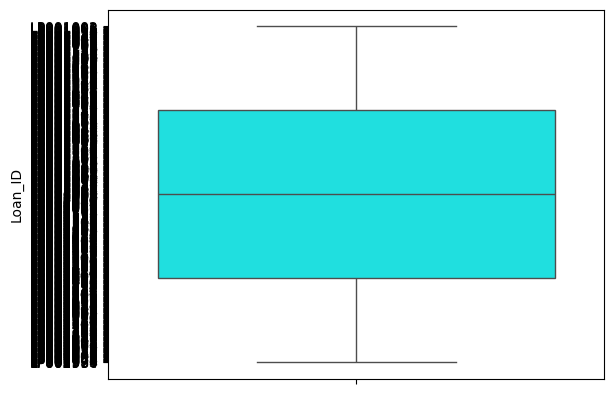

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


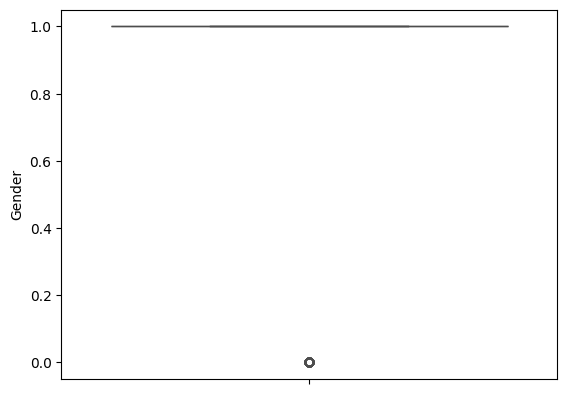

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


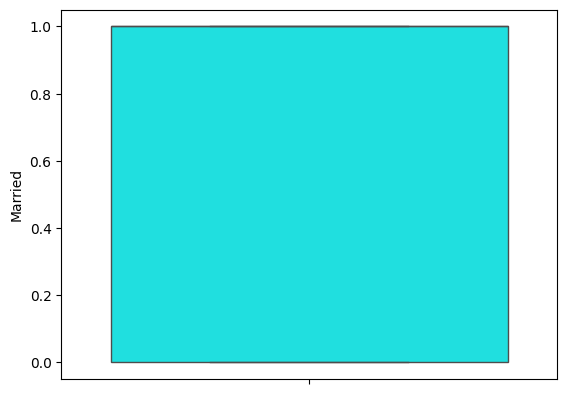

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


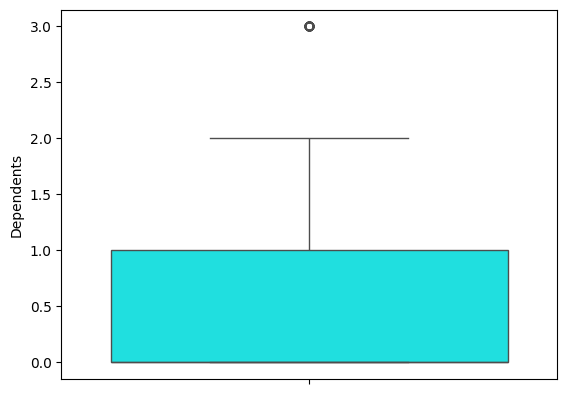

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


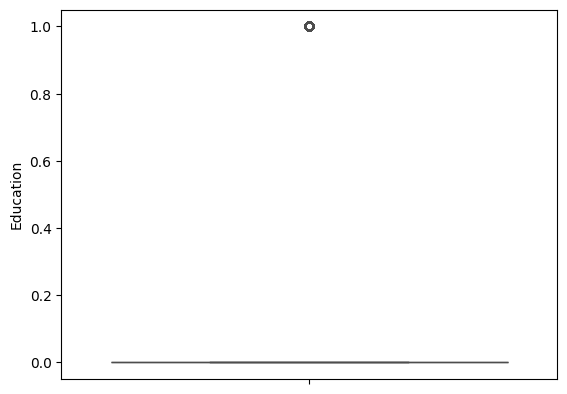

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


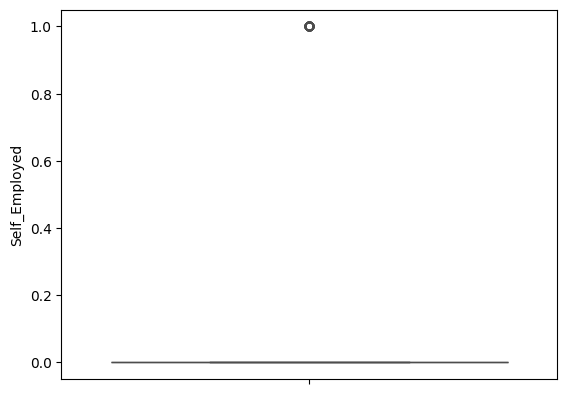

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


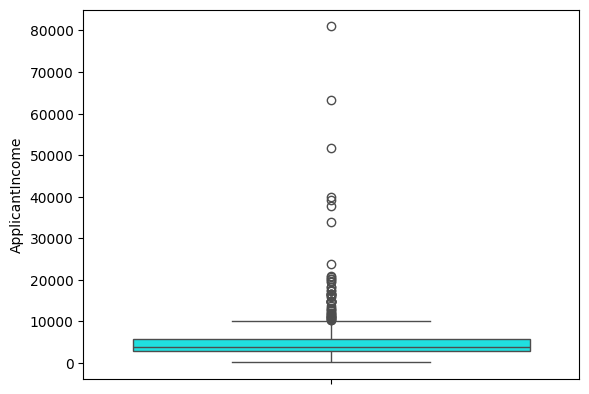

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


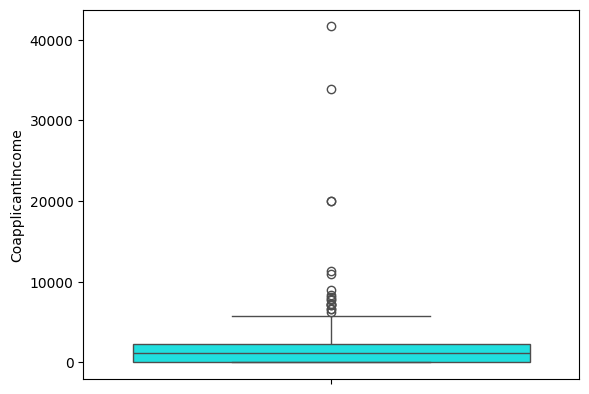

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


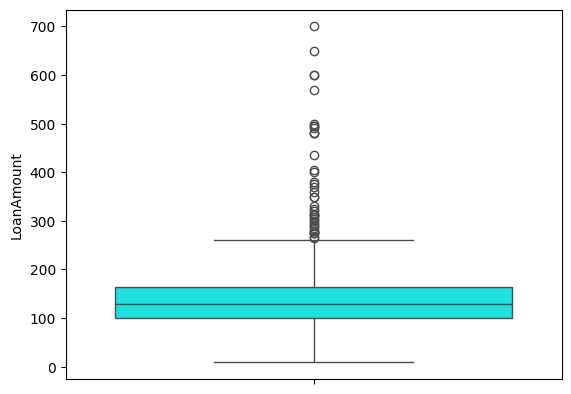

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


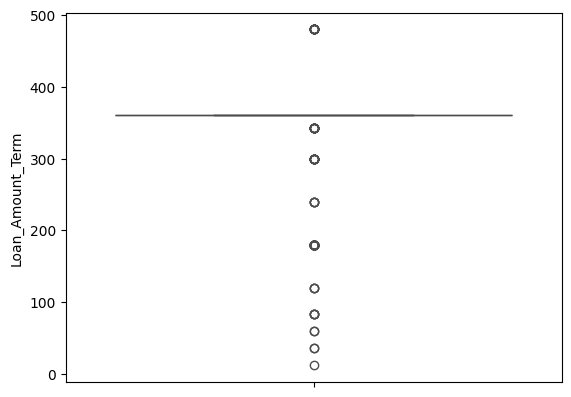

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


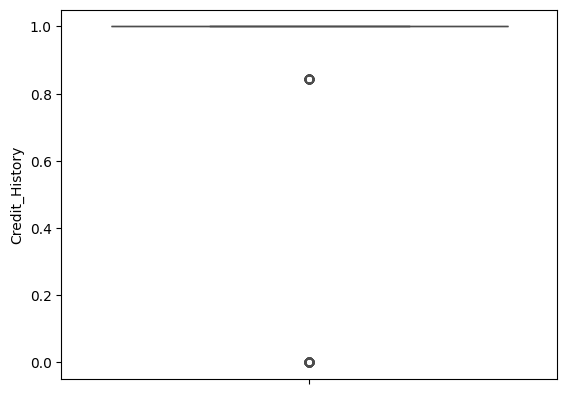

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


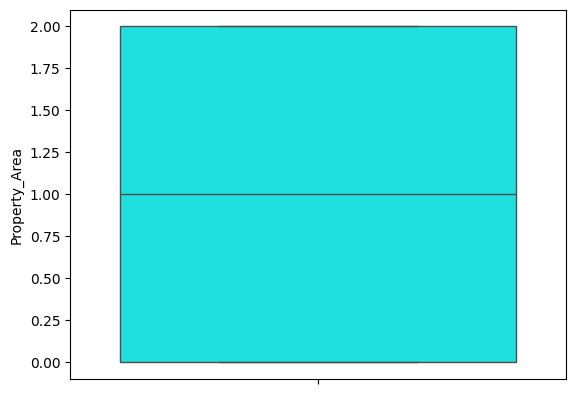

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


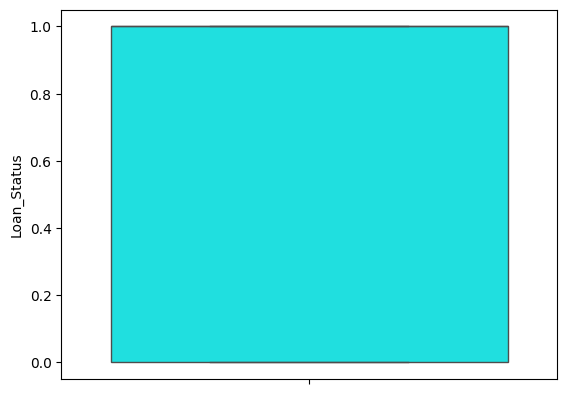

In [20]:
for col in df.columns:
 sns.boxplot(df[col], color='cyan')
 plt.show()

In [21]:
non_numeric_columns = df.select_dtypes(include=['object']).columns

print("Non-numeric columns:")
print(non_numeric_columns)

Non-numeric columns:
Index(['Loan_ID'], dtype='object')


In [22]:
exclude_column = 'Loan_ID'
columns = [col for col in df.columns if col != exclude_column]

In [23]:
for col in columns:
  if col == exclude_column:
    continue
  # Check if the column is numeric before calculating quantiles
  if pd.api.types.is_numeric_dtype(df[col]):
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.50)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5*IQR
    ub = Q3 + 1.5*IQR
    df[col] = df[col].clip(lb,ub)
    print(df[col])
  else:
    print(f"Skipping non-numeric column: {col}")

0      1
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Gender, Length: 614, dtype: int64
0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64
0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
609    0.0
610    2.5
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 614, dtype: float64
0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 614, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Self_Employed, Length: 614, dtype: int64
0      5849.0
1      4583.0
2      3000.0
3      2583.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8072.0
612    7583.0
613    4583.0
Name: ApplicantIncome, Length: 614, dtype: float64
0         0.0
1      1508.0
2         0.0
3      2358.0
4    

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


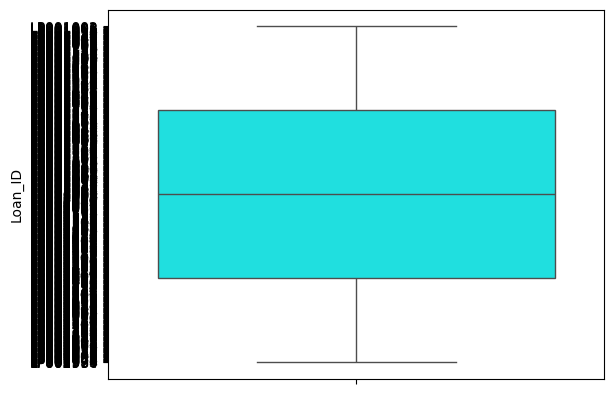

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


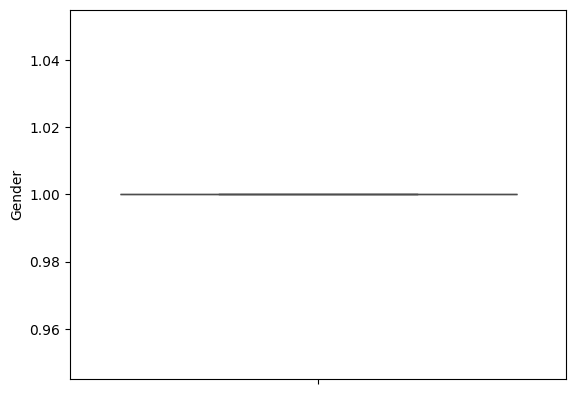

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


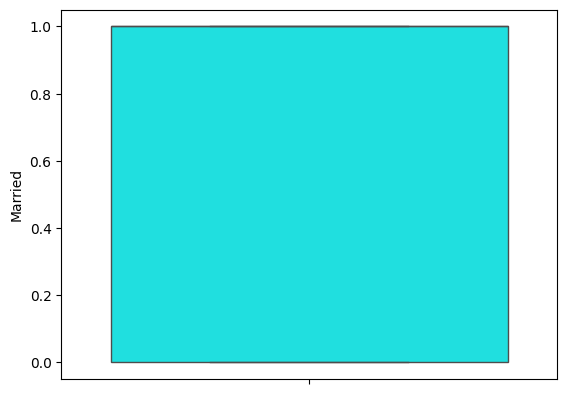

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


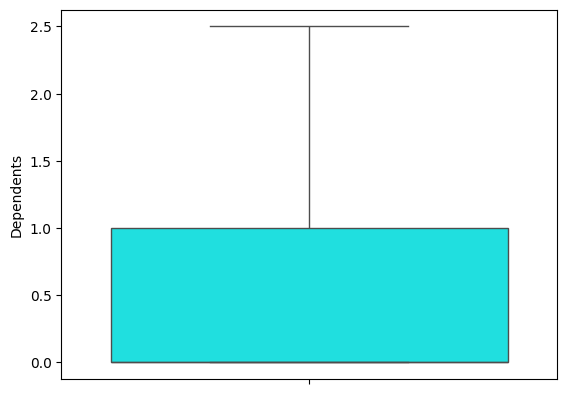

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


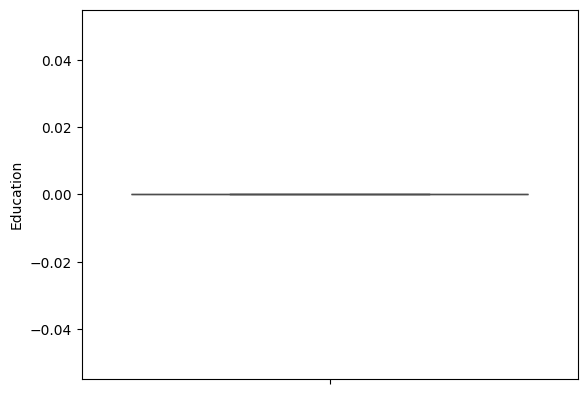

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


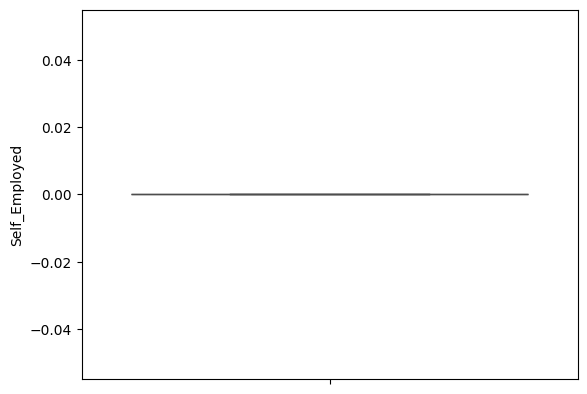

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


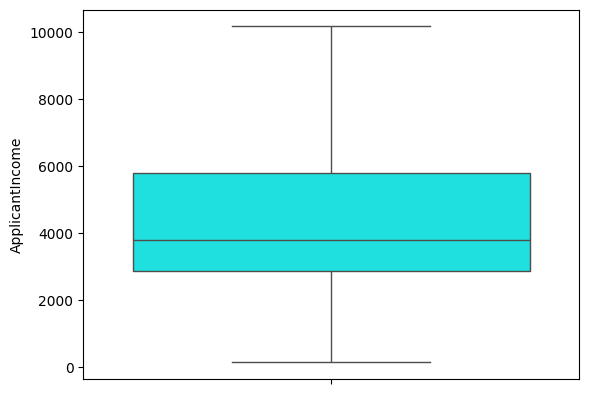

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


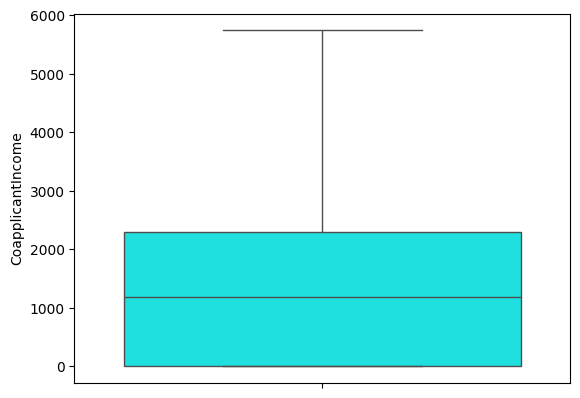

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


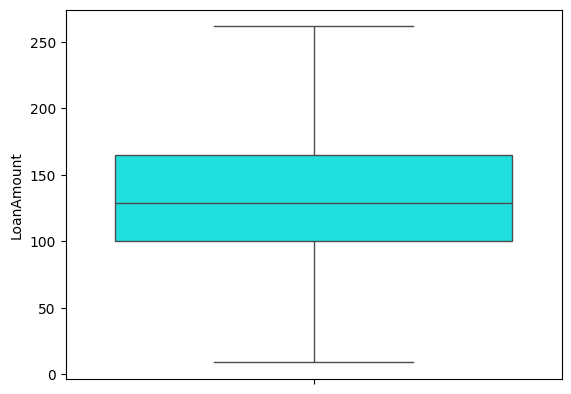

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


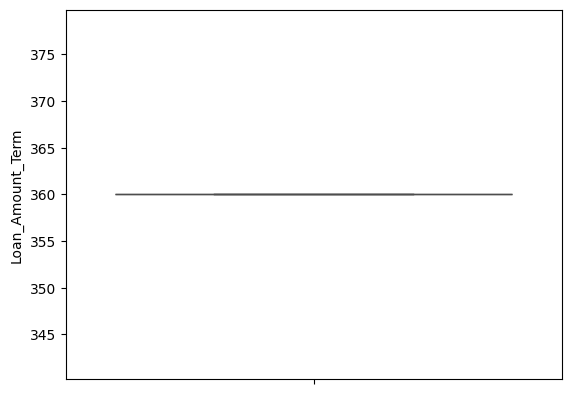

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


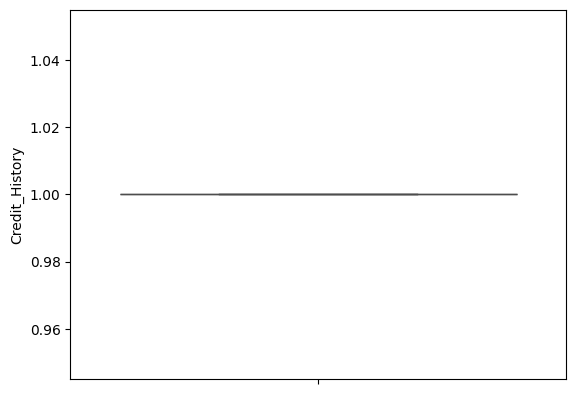

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


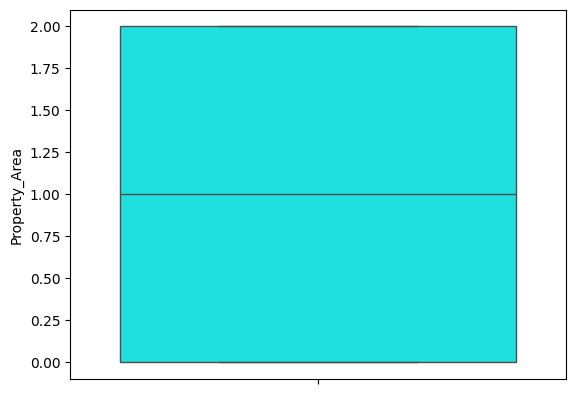

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


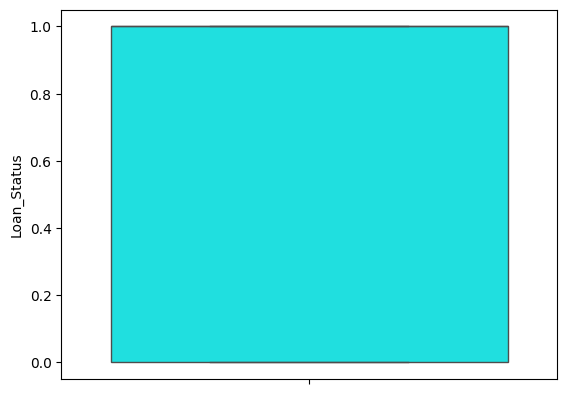

In [24]:
for col in df.columns:
  sns.boxplot(df[col], color='cyan')
  plt.show()

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['ApplicantIncome_scaled'] = scaler.fit_transform(df[['ApplicantIncome']])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_scaled
0,LP001002,1,0,0.0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1,0.568692
1,LP001003,1,1,1.0,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,0.442360
2,LP001005,1,1,0.0,0,0,3000.0,0.0,66.000000,360.0,1.0,2,1,0.284396
3,LP001006,1,1,0.0,0,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,0.242784
4,LP001008,1,0,0.0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1,0.583760


In [28]:
scaler = MinMaxScaler()
df['CoapplicantIncome_scaled'] = scaler.fit_transform(df[['CoapplicantIncome']])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled
0,LP001002,1,0,0.0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1,0.568692,0.000000,0.544207
1,LP001003,1,1,1.0,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,0.442360,0.262575,0.471287
2,LP001005,1,1,0.0,0,0,3000.0,0.0,66.000000,360.0,1.0,2,1,0.284396,0.000000,0.225743
3,LP001006,1,1,0.0,0,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,0.242784,0.410578,0.439604
4,LP001008,1,0,0.0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1,0.583760,0.000000,0.522772


In [29]:
scaler = MinMaxScaler()
df['LoanAmount_scaled'] = scaler.fit_transform(df[['LoanAmount']])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_scaled,CoapplicantIncome_scaled,LoanAmount_scaled
0,LP001002,1,0,0.0,0,0,5849.0,0.0,146.412162,360.0,1.0,2,1,0.568692,0.000000,0.544207
1,LP001003,1,1,1.0,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,0.442360,0.262575,0.471287
2,LP001005,1,1,0.0,0,0,3000.0,0.0,66.000000,360.0,1.0,2,1,0.284396,0.000000,0.225743
3,LP001006,1,1,0.0,0,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,0.242784,0.410578,0.439604
4,LP001008,1,0,0.0,0,0,6000.0,0.0,141.000000,360.0,1.0,2,1,0.583760,0.000000,0.522772
